In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.metrics import categorical_crossentropy
import numpy as np
from tensorflow.keras.models import Model
import os
import matplotlib.pyplot as plt

In [ ]:
import glob
i = []
for filename in glob.iglob(os.path.join("/content/drive/MyDrive/ActivityRecognitionOfAnimals/Fox", '*')):
	i.append(filename)
test = int(len(i)/100*5)
valid = test*2
train = (len(i))-test-valid
print("total = ",int(len(i)))
print("train = ",train)
print("valid = ",valid)
print("test = ",test)

In [7]:
import random
import glob
import shutil

In [ ]:
os.chdir("/content/drive/MyDrive/ActivityRecognitionOfAnimals/Fox")
for r in random.sample(glob.glob('*'), train):
  shutil.move(r, "/content/drive/MyDrive/ActivityRecognitionOfAnimals/train/fox")
for r in random.sample(glob.glob('*'), valid):
  shutil.move(r, "/content/drive/MyDrive/ActivityRecognitionOfAnimals/valid/fox")
for r in random.sample(glob.glob('*'), test):
  shutil.move(r, "/content/drive/MyDrive/ActivityRecognitionOfAnimals/test/fox")

In [5]:
train_path = "/content/drive/MyDrive/ActivityRecognitionOfAnimals/train"
valid_path = "/content/drive/MyDrive/ActivityRecognitionOfAnimals/valid"
test_path = "/content/drive/MyDrive/ActivityRecognitionOfAnimals/test"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
classes_list = ["bear","elephant","leopard","lion","wolf","horse","zebra","tiger","fox","kangaroo","rhino","giraffe","bull","deer","crocodile"]

In [8]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg19.preprocess_input) \
  .flow_from_directory(directory = train_path, target_size = (224,224), classes = classes_list, batch_size = 10) 
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg19.preprocess_input) \
  .flow_from_directory(directory = valid_path, target_size = (224,224), classes = classes_list, batch_size = 10) 
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg19.preprocess_input) \
  .flow_from_directory(directory = test_path, target_size = (224,224), classes = classes_list, batch_size = 10, shuffle = False) 

Found 13639 images belonging to 15 classes.
Found 1618 images belonging to 15 classes.
Found 911 images belonging to 15 classes.


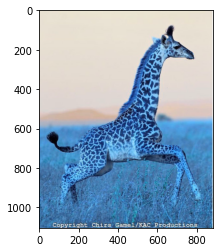

In [ ]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
im_cv = cv2.imread('/content/a.jpg')
pil_img = Image.fromarray(im_cv)
pil_img.save('/content/bgr.jpg')
plt.imshow(pil_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


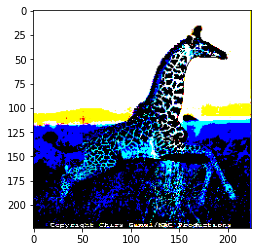

In [ ]:
img = image.load_img("/content/bgr.jpg", target_size=(224, 224))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

X = img_array
X -= np.mean(X, axis=0)
plt.imshow(X.reshape(224,224,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


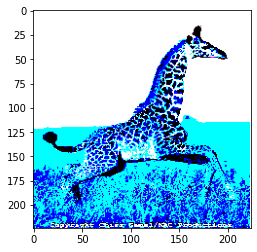

In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input

img = image.load_img("/content/a.jpg", target_size=(224, 224))

plt.imshow(img)

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

plt.imshow(img_preprocessed.reshape(224,224,3))

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img,ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis("off")
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

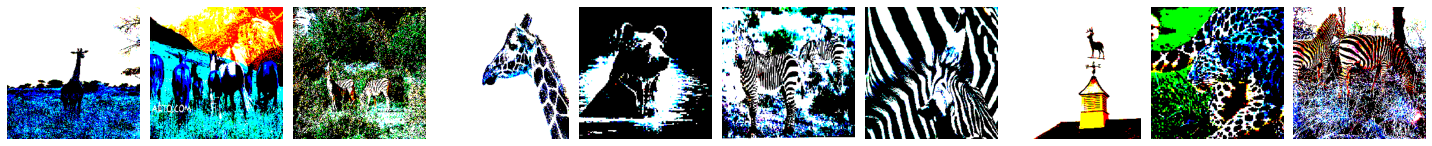

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
test_batches.class_indices

**VGG19**

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
modelVGG19 = VGG19()
modelVGG19.summary()

574717952/574710816 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
model = Sequential()
for layer in modelVGG19.layers[:-1]:
  model.add(layer)

In [ ]:
model.summary()

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
model.add(Dense(units = 15, activation="softmax"))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True

epochs = 5  # @param {type: "slider", min:1, max:20}
model.fit(x=train_batches, validation_data=valid_batches, epochs=epochs)

Epoch 1/5
1333/1333 [==============================] - 6296s 5s/step - loss: 0.3647 - accuracy: 0.8898 - val_loss: 0.1649 - val_accuracy: 0.9483
Epoch 2/5
1333/1333 [==============================] - 538s 404ms/step - loss: 0.1315 - accuracy: 0.9568 - val_loss: 0.1300 - val_accuracy: 0.9592
Epoch 3/5
1333/1333 [==============================] - 553s 415ms/step - loss: 0.0929 - accuracy: 0.9712 - val_loss: 0.1246 - val_accuracy: 0.9554
Epoch 4/5
1333/1333 [==============================] - 541s 406ms/step - loss: 0.0688 - accuracy: 0.9789 - val_loss: 0.1249 - val_accuracy: 0.9579
Epoch 5/5
1333/1333 [==============================] - 539s 405ms/step - loss: 0.0519 - accuracy: 0.9850 - val_loss: 0.1304 - val_accuracy: 0.9617


In [ ]:
model.save('/content/drive/MyDrive/ActivityRecognitionOfAnimals/Models/30_05_2021/30_05_2021_VGG19.h5')

In [3]:
model = tf.keras.models.load_model('/content/drive/MyDrive/h/Models/30_05_2021/30_05_2021_VGG19.h5')

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
test_batches.class_indices

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, Without Normmalization")

  print(cm)

  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
    
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

Confusion Matrix, Without Normmalization
[[ 49   0   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0  55   0   0   0   1   0   0   0   0   1   0   0   0   0]
 [  0   0  50   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  50   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  49   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0 124   0   0   0   0   1   1   0   1   0]
 [  0   0   0   0   0   0 110   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   1   0  73   1   0   1   0   0   0   0]
 [  0   0   0   0   1   0   0   1  22   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0  23   0   0   0  11   0]
 [  0   1   0   0   0   1   0   0   0   0  40   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38   0   3   0]
 [  1   1   0   0   0  72   1   1   0   0  26   0   0  25   0]
 [  0   0   0   0   0   1   0   1   0   3   0   0   0  57   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   8]]


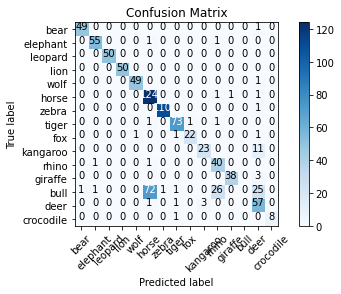

In [ ]:

plot_confusion_matrix(cm=cm, classes=classes_list, title="Confusion Matrix")

In [9]:
img_path = "/content/a.jpg"
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
prediction = model.predict(img_preprocessed)
print(next((k for k, v in test_batches.class_indices.items() if v == prediction.argmax())))

giraffe


**MobileNetV2**

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input) \
  .flow_from_directory(directory = train_path, target_size = (224,224), classes = classes_list, batch_size = 10) 
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input) \
  .flow_from_directory(directory = valid_path, target_size = (224,224), classes = classes_list, batch_size = 10) 
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input) \
  .flow_from_directory(directory = test_path, target_size = (224,224), classes = classes_list, batch_size = 10, shuffle = False) 

Found 13639 images belonging to 15 classes.
Found 1618 images belonging to 15 classes.
Found 911 images belonging to 15 classes.


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
modelMobileNetV2 = MobileNetV2()
modelMobileNetV2.summary()

In [ ]:
x = modelMobileNetV2.layers[-1].output
output = Dense(units=15, activation="softmax")(x)

In [ ]:

from tensorflow.keras.models import Model
mobileModel = Model(inputs=modelMobileNetV2.input, outputs=output)

In [ ]:
for layer in mobileModel.layers[:-23]:
  layer.trainable = False

In [ ]:
mobileModel.summary()

In [ ]:
mobileModel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 10  # @param {type: "slider", min:10, max:100}
mobileModel.fit(x=train_batches, validation_data=valid_batches, epochs=epochs,batch_size = 10)

Epoch 1/10
1364/1364 [==============================] - 5243s 4s/step - loss: 2.5576 - accuracy: 0.7247 - val_loss: 2.4621 - val_accuracy: 0.7948
Epoch 2/10
1364/1364 [==============================] - 531s 390ms/step - loss: 2.3763 - accuracy: 0.8012 - val_loss: 2.2973 - val_accuracy: 0.7942
Epoch 3/10
1364/1364 [==============================] - 528s 387ms/step - loss: 2.2096 - accuracy: 0.8118 - val_loss: 2.1280 - val_accuracy: 0.8158
Epoch 4/10
 242/1364 [====>.........................] - ETA: 6:14 - loss: 2.1123 - accuracy: 0.8157

In [ ]:
test_labels = test_batches.classes

In [ ]:
predictions = mobileModel.predict(x=test_batches, verbose=0)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [ ]:
test_batches.class_indices

In [ ]:
plot_confusion_matrix(cm=cm, classes=classes_list, title="Confusion Matrix")

False


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2
vidcap = cv2.VideoCapture('horse.mp4')
success,image = vidcap.read()
while success: 
  success,image = vidcap.read()
  print(image)
